In [84]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from matplotlib import pyplot as plt

In [85]:
# NUM_NEURON = 50
NUM_FEATURES = 6

keep_prob = 0.8
learning_rate = 10**-3
beta = 10**-3

epochs = 1500
batch_size = 8

df = pd.read_csv("data/admission_predict.csv")
df = df.drop(['Serial No.'], axis=1)

y = df['Chance of Admit'].to_numpy()
y = np.reshape(y, (y.shape[0], 1))

#Optimized one 
features = df.drop(["Chance of Admit", 'SOP'], axis=1).to_numpy()

In [86]:
def neural_net(x):
    #hidden layer 1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1) #activation function
    layer_1 = tf.nn.dropout(layer_1, rate=(1-keep_prob))
    
    #hidden layer 2
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2) #activation function
    layer_2 = tf.nn.dropout(layer_2, rate=(1-keep_prob))
    
    #hidden layer 3
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3) #activation function
    layer_3 = tf.nn.dropout(layer_3, rate=(1-keep_prob))
    
    #linear activation
    
#     out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
#     out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return (out_layer)


weights = {
    'h1': tf.Variable(tf.truncated_normal([NUM_FEATURES, NUM_NEURON], seed=1337, stddev=1.0 / np.sqrt(NUM_FEATURES), dtype=tf.float32)),
    'h2': tf.Variable(tf.truncated_normal([NUM_NEURON, NUM_NEURON], seed=1337, stddev=1.0 / np.sqrt(NUM_FEATURES), dtype=tf.float32)),
    'h3': tf.Variable(tf.truncated_normal([NUM_NEURON, NUM_NEURON], seed=1337, stddev=1.0 / np.sqrt(NUM_FEATURES), dtype=tf.float32)),
    'out': tf.Variable(tf.truncated_normal([NUM_NEURON, 1], seed=1337, stddev=1.0 / np.sqrt(NUM_FEATURES), dtype=tf.float32))# 1 ouput label
}

biases = {
    'b1': tf.Variable(tf.zeros([1]), dtype=tf.float32),
    'b2': tf.Variable(tf.zeros([1]), dtype=tf.float32),
    'b3': tf.Variable(tf.zeros([1]), dtype=tf.float32),
    'out': tf.Variable(tf.zeros([1]), dtype=tf.float32)
}

In [87]:
np.random.seed(1337)
tf.set_random_seed(1337)

#Create model
X = tf.placeholder(tf.float32, [None, NUM_FEATURES])
Y = tf.placeholder(tf.float32, [None, 1])


x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3)
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#predicted value
Y_hat = neural_net(X)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
loss = tf.reduce_mean(tf.square(Y - Y_hat)) 
reg = tf.nn.l2_loss(weights['h1']) + tf.nn.l2_loss(weights['h2'])  + tf.nn.l2_loss(weights['h3']) +  tf.nn.l2_loss(weights['out'])
train_op = optimizer.minimize(loss + reg * beta)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_train_err = []
    test_err = []
    for i in range(epochs):

        #Batch training
        #pick random batch_size data points from x_train
        rand_index = np.random.choice(x_train.shape[0], size=batch_size)
        x_batch = x_train[rand_index]
        y_batch = y_train[rand_index]

        train_op.run(feed_dict={X:x_batch, Y:y_batch})
      

        if(i%10==0):
            batch_train_err.append(loss.eval(feed_dict={X: x_batch, Y: y_batch}))
            test_err.append(loss.eval(feed_dict={X: x_test, Y: y_test}))   
            print ("epoch %d: train err %g, test error %g " % (i, batch_train_err[-1], test_err[-1]))
            
    #Q1c) Select 50 x_test samples
    sample_index = np.random.choice(x_test.shape[0], size=50)
    x_test_sample = x_test[sample_index]
    y_test_sample = y_test[sample_index]
    #plot y_hat and y_test

    pred = sess.run(Y_hat, feed_dict={X:x_test_sample})


epoch 0: train err 31.5707, test error 39.7861 
epoch 10: train err 1.31821, test error 2.78245 
epoch 20: train err 0.774742, test error 2.18746 
epoch 30: train err 2.88233, test error 1.71839 
epoch 40: train err 0.950561, test error 0.972321 
epoch 50: train err 0.33975, test error 1.10141 
epoch 60: train err 0.386064, test error 1.19757 
epoch 70: train err 0.532397, test error 0.782863 
epoch 80: train err 1.50318, test error 1.0218 
epoch 90: train err 1.76787, test error 1.0504 
epoch 100: train err 0.324651, test error 0.690279 
epoch 110: train err 0.586549, test error 1.0497 
epoch 120: train err 0.272866, test error 0.527413 
epoch 130: train err 1.86582, test error 0.795552 
epoch 140: train err 0.460276, test error 0.415004 
epoch 150: train err 0.14744, test error 0.503251 
epoch 160: train err 0.20157, test error 0.577907 
epoch 170: train err 0.58969, test error 0.449825 
epoch 180: train err 0.405323, test error 0.39878 
epoch 190: train err 0.661051, test error 0.36

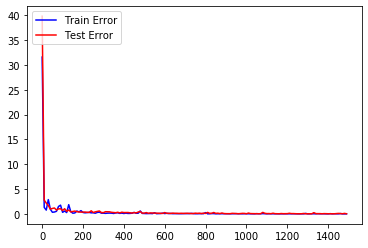

In [88]:
#Q1a plot train err against test err
plt.plot(range(0, epochs, 10), batch_train_err, color='blue', label='Train Error')
plt.plot(range(0, epochs, 10), test_err, color ='red', label='Test Error')
plt.legend(loc='upper left')

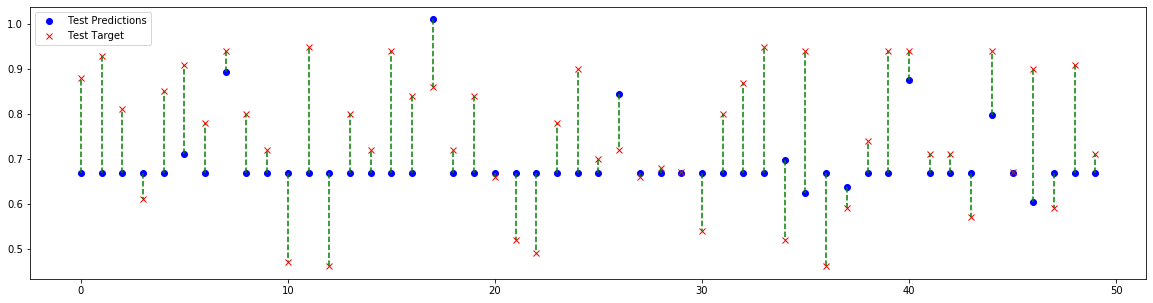

In [89]:
plt.figure(figsize=(20,5))

plt.plot(pred, color='blue', linestyle='', marker='o', label='Test Predictions')
plt.plot(y_test_sample, color='red', linestyle='', marker='x', label='Test Target')

zipped_list = zip(pred.tolist(), y_test_sample.tolist())


#connects the dots between the preidction and target 
for index, line in enumerate(zipped_list):
    x = [index, index]
    plt.plot(x, line, linestyle='--', color='green')
    
plt.legend(loc='upper left')